In [1]:
#Import necessary libraries for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

The `amir_deals` table is loaded in the first few lines of code and is available to use.

**Instructions:**
1. Create a histogram with 10 bins to visualize the distribution of the `amount`. Show the plot.
2. Which probability distribution do the sales amounts most closely follow?
* A. Uniform
* B. Binomial
* C. Normal
* D. None of the above


   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17


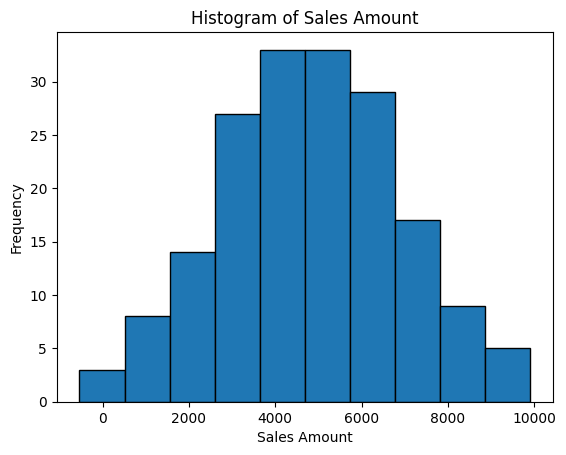

In [3]:
#Loading the amir_deals DataFrame from the source dataset file
amir_deals = pd.read_csv("https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/amir_deals.csv?raw=True")

# Print the first five rows of the DataFrame
print(amir_deals.head())

#1. Histogram of amount with 10 bins and show plot
plt.hist(amir_deals['amount'], bins=10, edgecolor='black')
plt.title('Histogram of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


#2. Which probability distribution? print out the answer from the options given as A, b, C or D
print('normal')


# **Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of `amir_deals` and follow a normal distribution with a mean of `5000` dollars and a standard deviation of `2000` dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

norm from scipy.stats is imported in the first few lines and the DataFrame `amir_deals` is loaded previously.

**Instructions:**
1. What's the probability of Amir closing a deal worth less than `$7500`?

2. What's the probability of Amir closing a deal worth more than `$1000`?

3. What's the probability of Amir closing a deal worth between` $3000` and `$7000`?

4. What amount will `25%` of Amir's sales be less than?


In [ ]:
from scipy.stats import norm



# Given parameters for the normal distribution
mean = 5000  # mean sales amount in dollars
std_dev = 2000  # standard deviation in dollars

# 1. Probability of Amir closing a deal worth less than $7500
prob_less_than_7500 = norm.cdf(7500, loc=mean, scale=std_dev)

# 2. Probability of Amir closing a deal worth more than $1000
prob_more_than_1000 = 1 - norm.cdf(1000, loc=mean, scale=std_dev)

# 3. Probability of Amir closing a deal worth between $3000 and $7000
prob_between_3000_and_7000 = norm.cdf(7000, loc=mean, scale=std_dev) - norm.cdf(3000, loc=mean, scale=std_dev)

# 4. Amount that 25% of Amir's sales will be less than (25th percentile)
sales_25_percentile = norm.ppf(0.25, loc=mean, scale=std_dev)

# Printing the results
prob_less_than_7500, prob_more_than_1000, prob_between_3000_and_7000, sales_25_percentile








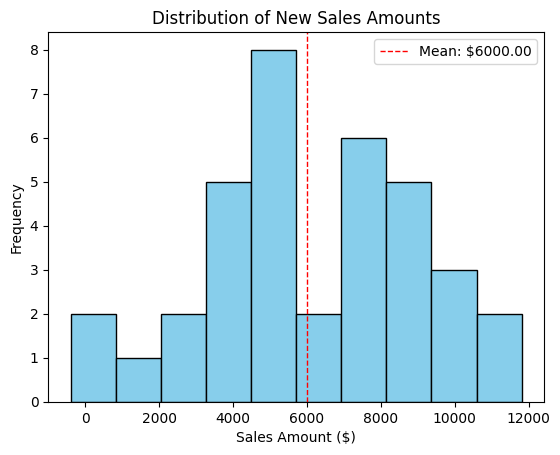

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given current values for mean and standard deviation
current_mean = 5000  # Current average sale amount in dollars
current_sd = 2000  # Current standard deviation in dollars

# 1. Calculate new mean with a 20% increase
new_mean = current_mean * 1.20

# 2. Calculate new standard deviation with a 30% increase
new_sd = current_sd * 1.30

# 3. Simulate 36 new sales amounts from the updated normal distribution
new_sales = np.random.normal(loc=new_mean, scale=new_sd, size=36)

# 4. Plot the distribution of the new_sales amounts using a histogram
plt.hist(new_sales, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of New Sales Amounts")
plt.xlabel("Sales Amount ($)")
plt.ylabel("Frequency")
plt.axvline(new_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: ${new_mean:.2f}')
plt.legend()


# **Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over `$1000` since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of `$5000` and a standard deviation of `$2000`, and Amir's predicted amounts in next quarter's market have a mean of `$6000` and a standard deviation of `$2600`.

Based only on the metric of percent of sales over `$1000`, does Amir perform better in the current market or the predicted market?
* A. Amir performs much better in the current market.
* B. Amir performs much better in next quarter's predicted market.
* C. Amir performs about equally in both markets.

In [5]:
#Do some basic analysis here using normal distribution and compare

from scipy.stats import norm

# Given values for both markets
mean_current = 5000
std_dev_current = 2000
mean_predicted = 6000
std_dev_predicted = 2600
threshold = 1000

# Calculate z-scores for both markets
z_current = (threshold - mean_current) / std_dev_current
z_predicted = (threshold - mean_predicted) / std_dev_predicted

# Calculate probabilities that sales exceed $1000
p_current = 1 - norm.cdf(z_current)
p_predicted = 1 - norm.cdf(z_predicted)

p_current, p_predicted

# Print if choice A, B or C is the right answer here. Give attention to words used such as 'much better' and 'about equally'
print('A')

A


# **The Central Limit Theorem (ClT) in action**

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

The `amir_deals` DataFrame is loaded and available to use.

**Instructions:**
1. Create a histogram of the `num_users` column of `amir_deals` and show the plot.
2. Set the seed to `104`. Take a sample of size `20` with replacement from the `num_users` column of `amir_deals`, and take the mean.
3. Repeat this `100` times using a `for` loop and store as `sample_means`. This will take `100` different samples and calculate the mean of each.
4. Convert `sample_means` into a `pd.Series`, create a histogram of the `sample_means`, and show the plot.



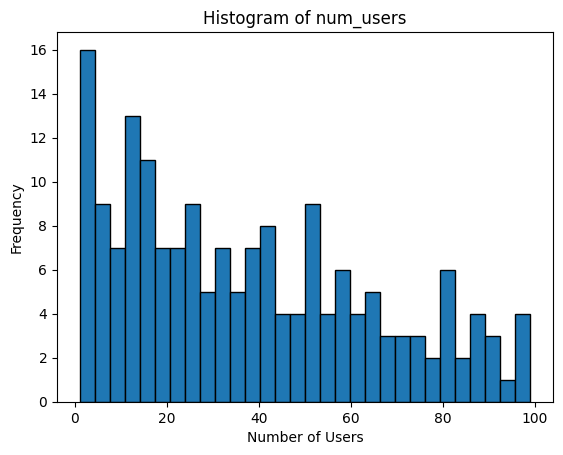

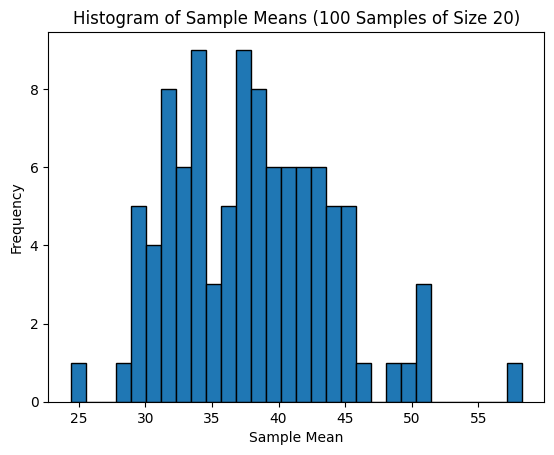

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(104)

# Assuming amir_deals DataFrame is already loaded
# Create a histogram of the num_users column
plt.hist(amir_deals['num_users'], bins=30, edgecolor='black')
plt.title('Histogram of num_users')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.show()

# Sample means list
sample_means = []

# Take 100 samples of size 20 with replacement and calculate the mean
for _ in range(100):
    sample = np.random.choice(amir_deals['num_users'], size=20, replace=True)
    sample_means.append(sample.mean())

# Convert sample_means to a pd.Series
sample_means_series = pd.Series(sample_means)

# Create a histogram of the sample means
plt.hist(sample_means_series, bins=30, edgecolor='black')
plt.title('Histogram of Sample Means (100 Samples of Size 20)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# **The mean of means**

You want to know what the average number of users (`num_users`) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

`amir_deals` is loaded previously and available to use and the user data for all the company's deals is available in `all_deals` loaded in the first few lines of code given below.

**Instructions:**
1. Set the random seed to `321`.
2. Take 30 samples (with replacement) of size 20 from `all_deals['num_users']` and take the mean of each sample. Store the sample means in `sample_means`.
3. Print the mean of `sample_means`.
4. Print the mean of the `num_users` column of `amir_deals`.


In [9]:
#Loade all_deals DataFrame from a source dataset file
all_deals = pd.read_csv("https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/all_deals.csv?raw=True")

#Displaying the first few rows of the DataFrame
print(all_deals.head())

#1. Set seed to 321
np.random.seed(321)

#2. sample means from several samples

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  sample = np.random.choice(all_deals['num_users'], size=20, replace=True)
  sample_means.append(sample.mean())

# Calculate and print the mean of sample_means
mean_of_sample_means = np.mean(sample_means)
print("Mean of sample means:", mean_of_sample_means)

# Calculate and print the mean of the num_users column of amir_deals
mean_of_amir_deals = amir_deals['num_users'].mean()
print("Mean of num_users in Amir's deals:", mean_of_amir_deals)


   product  num_users
0     3544         19
1     5073         43
2     6149         87
3     7863         83
4       14         17
Mean of sample means: 38.31333333333332
Mean of num_users in Amir's deals: 37.651685393258425


**Identifying lambda**

You've learned about the Poisson distribution, you know that its shape is described by a value called lambda. In this exercise, you'll match histograms to lambda values.

Instructions:
* Match each Poisson distribution to its lambda valuse i.e either `1`, `4` or `8`.
1.

 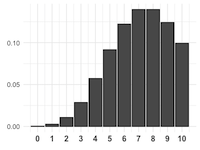

2.

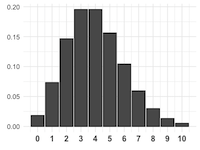

3.

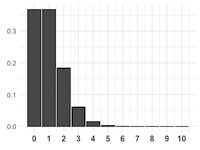

In [10]:
#1. Print the lambda value of distribution shown in #1 either 1, 4, or 8
print(8)

#2. Print the lambda value of distribution shown in #2 either 1, 4, or 8
print(4)

#3. Print the lambda value of distribution shown in #3 either 1, 4, or 8
print(1)


8
4
1


In [11]:
from scipy.stats import poisson

# 1. Probability that Amir responds to 5 leads in a day (lambda = 4)
prob_5_amir = poisson.pmf(5, mu=4)
print("Probability Amir responds to 5 leads:", prob_5_amir)

# 2. Probability that Amir's coworker responds to 5 leads in a day (lambda = 5.5)
prob_5_coworker = poisson.pmf(5, mu=5.5)
print("Probability coworker responds to 5 leads:", prob_5_coworker)

# 3. Probability that Amir responds to 2 or fewer leads in a day (lambda = 4)
prob_2_or_fewer_amir = poisson.cdf(2, mu=4)
print("Probability Amir responds to 2 or fewer leads:", prob_2_or_fewer_amir)

# 4. Probability that Amir responds to more than 10 leads in a day (lambda = 4)
prob_more_than_10_amir = 1 - poisson.cdf(10, mu=4)
print("Probability Amir responds to more than 10 leads:", prob_more_than_10_amir)

Probability Amir responds to 5 leads: 0.1562934518505317
Probability coworker responds to 5 leads: 0.17140068409793663
Probability Amir responds to 2 or fewer leads: 0.23810330555354436
Probability Amir responds to more than 10 leads: 0.0028397661205137315


# **Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

**Instructions:**
1. Import `poisson` from `scipy.stats` and calculate the probability that Amir responds to `5` leads in a day, given that he responds to an average of `4`.

2. Amir's coworker responds to an average of `5.5` leads per day. What is the probability that she answers `5` leads in a day?

3. What's the probability that Amir responds to `2` or fewer leads in a day?

4. What's the probability that Amir responds to more than `10` leads in a day?


# **Distribution matching**

By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.

**Instructions:**
* Match each situation to the distribution that best models it as `"Poisson"`, `"Exponential"` or `"Binomial"` and print the name of the distributions in the codecell below.
1. Amount of time until the next customer makes a purchase
2. Number of products sold each week.
3. Amount of time until someone pays of their loan.
4. Number of people from 30 individuals who pass their driving test.
5. Number of people who enter a store per each hour.


In [ ]:
#1. Print either "Poisson", "Exponential" or "Binomial" matching a distribution type given in #1
print(e)

#2. Print either "Poisson", "Exponential" or "Binomial" matching a distribution type given in #2
print(p)

#3. Print either "Poisson", "Exponential" or "Binomial" matching a distribution type given in #3
print(e)

#4. Print either "Poisson", "Exponential" or "Binomial" matching a distribution type given in #4
print(b)

#5. Print either "Poisson", "Exponential" or "Binomial" matching a distribution type given in #5
print(p)


# **Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to `1 `request every `2.5` hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

Instructions:
1. Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?

2. What's the probability it takes Amir more than 4 hours to respond to a lead?

3. What's the probability it takes Amir 3-4 hours to respond to a lead?


In [12]:
from scipy.stats import expon

# Rate parameter (lambda)
lambda_rate = 0.4
scale_param = 1 / lambda_rate  # Scale is the inverse of the rate

# 1. Probability it takes less than 1 hour
prob_less_than_1 = expon.cdf(1, scale=scale_param)
print("Probability it takes less than 1 hour:", prob_less_than_1)

# 2. Probability it takes more than 4 hours
prob_more_than_4 = 1 - expon.cdf(4, scale=scale_param)
print("Probability it takes more than 4 hours:", prob_more_than_4)

# 3. Probability it takes 3-4 hours
prob_3_to_4 = expon.cdf(4, scale=scale_param) - expon.cdf(3, scale=scale_param)
print("Probability it takes between 3 and 4 hours:", prob_3_to_4)


Probability it takes less than 1 hour: 0.3296799539643607
Probability it takes more than 4 hours: 0.20189651799465536
Probability it takes between 3 and 4 hours: 0.09929769391754684


# **The t-distribution**

Which statement is not true regarding the t-distribution? Select one answer.
* A. The t-distribution has thicker tails than the normal distribution.
* B. A t-distribution with high degrees of freedom resembles the normal distribution.
* C. The number of degrees of freedom affects the distribution's variance.
* D. The t-distribution is skewed.

In [14]:
#Print either A, B, C or D as choice of the above question.
print('D')


D
